# Learning Data Exploration

Visualizing the data we have according to the 
[Watkins Marine Mammals Training](https://www.notion.so/Watkins-Marine-Mammals-Training-2af139308ccd80da9d1bd23f01d6fdbb) Notion page. We have a dataset of audios. Lets showcase the audio files, times, audio durations, start and end times, and species.




## Setting up

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import soundfile as sf
import matplotlib.colors as mcolors
import seaborn as sns

I found out how to access thru relative directory !! :)

In [10]:
ROOT_PATH = Path("../../..")  

AUDIO_DIR = ROOT_PATH / "Bens-Internship-Local" / "Data" / "Audio"
ANNOT_DIR = ROOT_PATH / "Bens-Internship-Local" / "Data" / "Annotations"
SPECT_DIR = ROOT_PATH / "Bens-Internship-Local" / "Data" / "Spectrograms"

print("AUDIO_DIR exists:", AUDIO_DIR.exists())
print("ANNOT_DIR exists:", ANNOT_DIR.exists())
print("SPECT_DIR exists:", SPECT_DIR.exists())


AUDIO_DIR exists: True
ANNOT_DIR exists: True
SPECT_DIR exists: True


## Basic CSV file for helping data exploration

In [11]:
import sys
sys.path.append("..")

ANNOT_FILE = ANNOT_DIR / "audio_annotations.csv"

from src.preprocess.metadata import build_annotation_file

# build_annotation_file(AUDIO_DIR, ANNOT_FILE)

## Number of Audio Files per Category

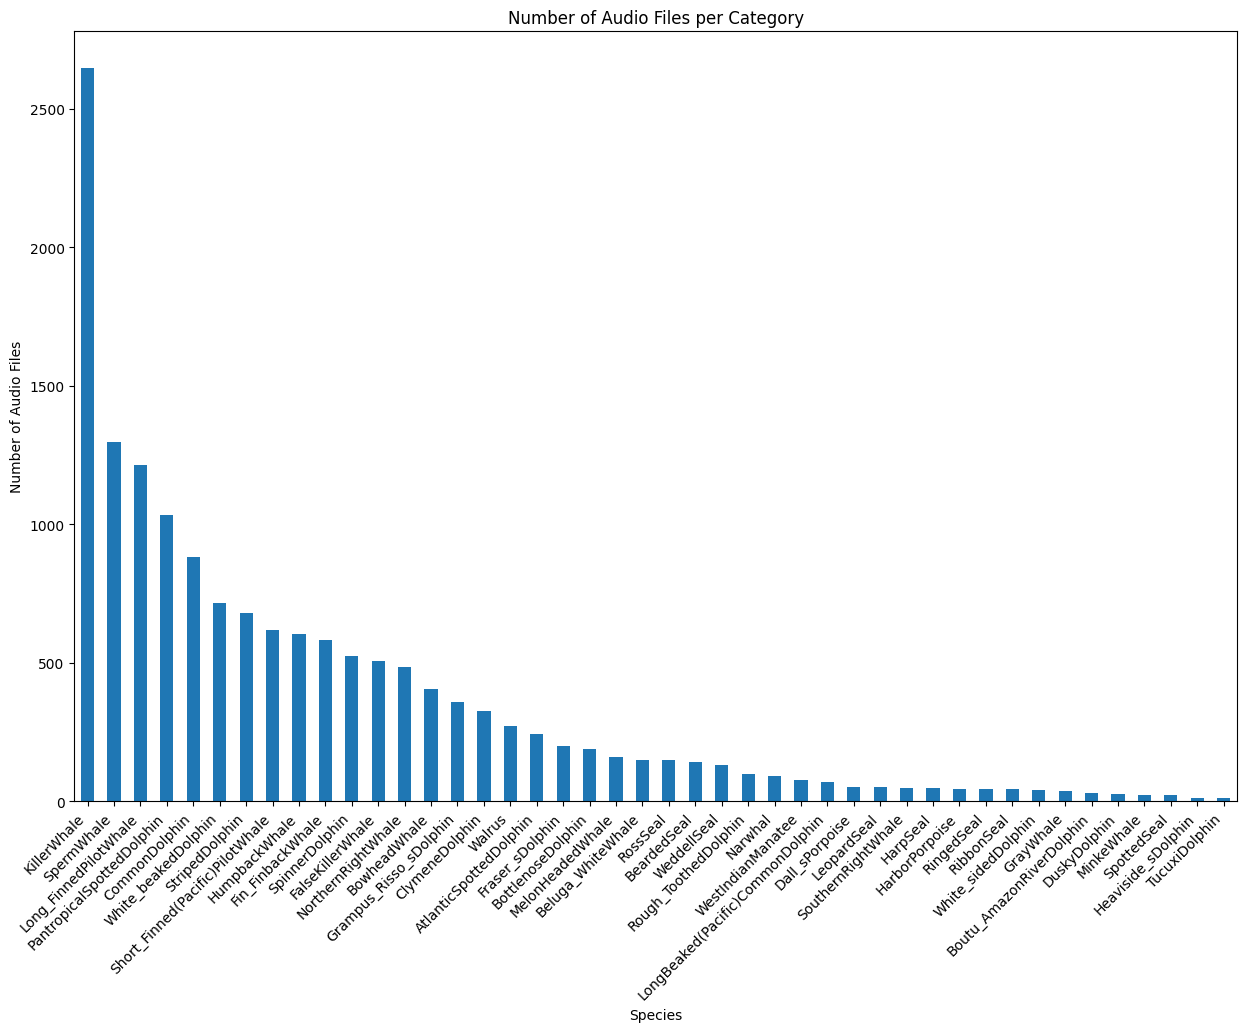

In [12]:
categories = [f for f in AUDIO_DIR.iterdir() if f.is_dir()]
# print("Species:", [c.name for c in categories])  species 
df = pd.read_csv(ANNOT_FILE)

category_counts = {}
for cat in categories:
    wav_files = list(cat.rglob("*.wav"))  # include sub-subfolders if any
    category_counts[cat.name] = len(wav_files)

# print("Files per category:", category_counts) files per category

species_counts = df['category'].value_counts()


plt.figure(figsize=(15,10))
species_counts.plot(kind='bar')
plt.xlabel("Species")
plt.ylabel("Number of Audio Files")
plt.title("Number of Audio Files per Category")
plt.xticks(rotation=45, ha="right")
plt.show()

## Total Audio Duration per Category

In [13]:
# List categories (subfolders)
categories = [f for f in AUDIO_DIR.iterdir() if f.is_dir()]
print("Categories found:", [c.name for c in categories])

# Sum durations per category
category_durations = {}

for cat in categories:
    total_duration = 0
    for audio_file in cat.rglob("*.wav"):  # include sub-subfolders
        try:
            info = sf.info(audio_file)
            total_duration += info.frames / info.samplerate
        except Exception as e:
            print(f"Error reading {audio_file}: {e}")
    category_durations[cat.name] = total_duration

print("Total duration per category (seconds):", category_durations)

# Plot bar chart
plt.figure(figsize=(15,10))
plt.bar(category_durations.keys(), category_durations.values())
plt.xlabel("Category")
plt.ylabel("Total Duration (seconds)")
plt.title("Total Audio Duration per Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Categories found: ['AtlanticSpottedDolphin', 'BeardedSeal', 'Beluga_WhiteWhale', 'BottlenoseDolphin', 'Boutu_AmazonRiverDolphin', 'BowheadWhale', 'ClymeneDolphin', 'CommonDolphin', 'Dall_sPorpoise', 'DuskyDolphin', 'FalseKillerWhale', 'Fin_FinbackWhale', 'Fraser_sDolphin', 'Grampus_Risso_sDolphin', 'GrayWhale', 'HarborPorpoise', 'HarpSeal', 'Heaviside_sDolphin', 'HumpbackWhale', 'KillerWhale', 'LeopardSeal', 'LongBeaked(Pacific)CommonDolphin', 'Long_FinnedPilotWhale', 'MelonHeadedWhale', 'MinkeWhale', 'Narwhal', 'NorthernRightWhale', 'PantropicalSpottedDolphin', 'RibbonSeal', 'RingedSeal', 'RossSeal', 'Rough_ToothedDolphin', 'Short_Finned(Pacific)PilotWhale', 'SouthernRightWhale', 'SpermWhale', 'SpinnerDolphin', 'SpottedSeal', 'StripedDolphin', 'TucuxiDolphin', 'Walrus', 'WeddellSeal', 'WestIndianManatee', 'White_beakedDolphin', 'White_sidedDolphin']


KeyboardInterrupt: 

## Number of Audio Files per Species and Sample Rate

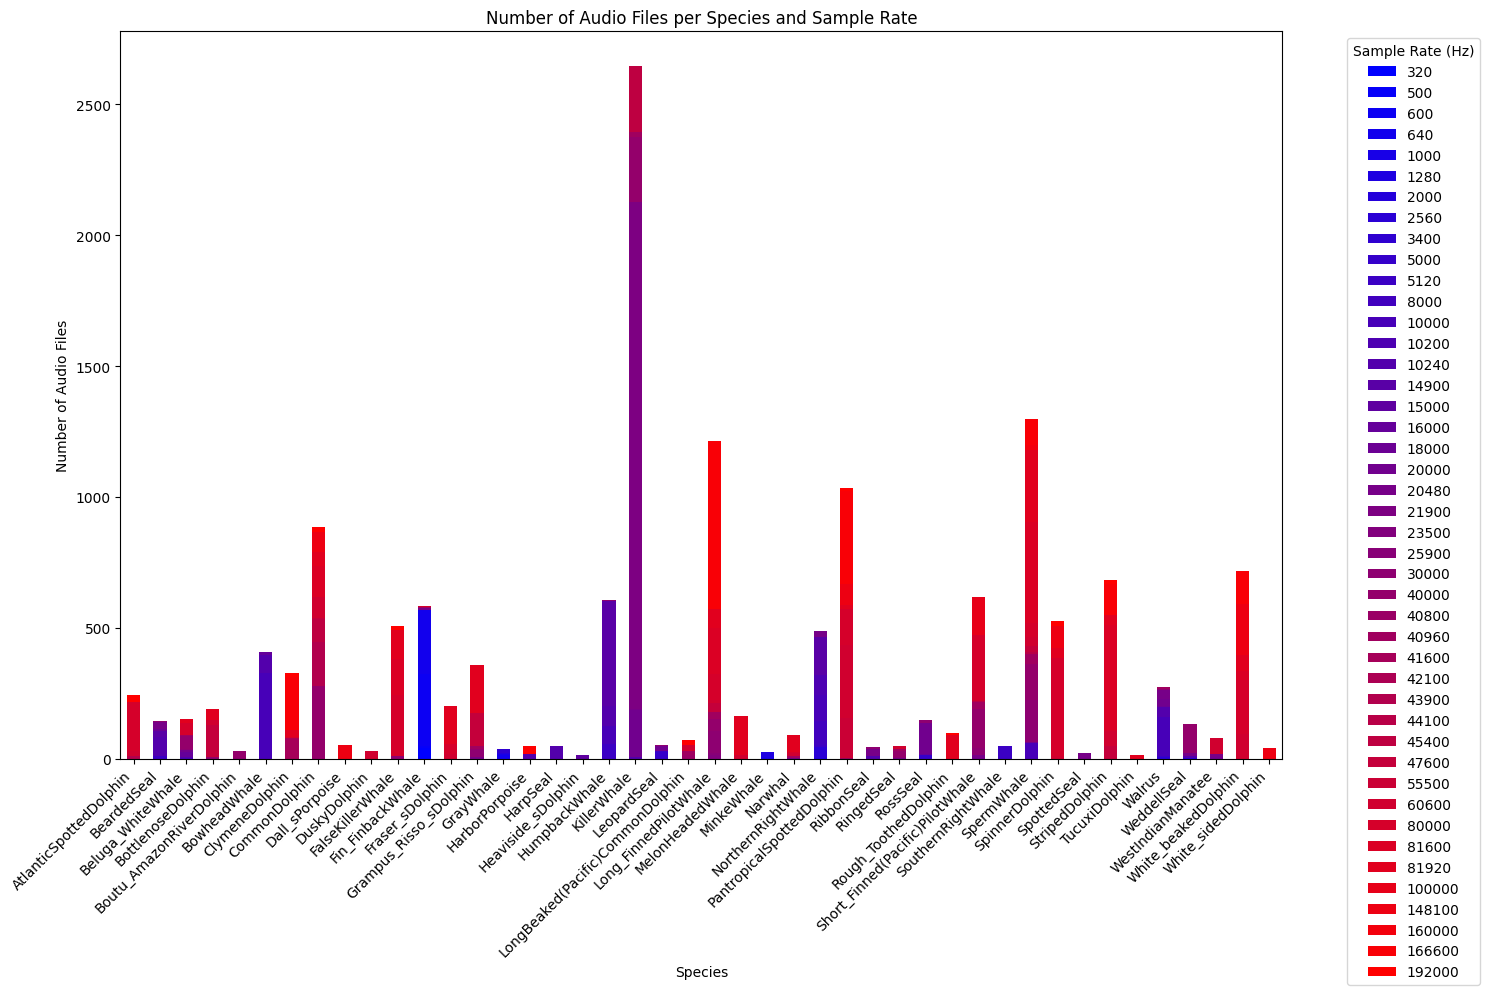

In [ ]:
# List categories (species)
categories = [f for f in AUDIO_DIR.iterdir() if f.is_dir()]

# Step 2: Build a DataFrame with counts per sample rate
data = []

for cat in categories:
    sample_rate_counts = {}
    for audio_file in cat.rglob("*.wav"):
        try:
            info = sf.info(audio_file)
            sr = info.samplerate
            sample_rate_counts[sr] = sample_rate_counts.get(sr, 0) + 1
        except Exception as e:
            print(f"Error reading {audio_file}: {e}")
    for sr, count in sample_rate_counts.items():
        data.append({
            "category": cat.name,
            "sample_rate": sr,
            "count": count
        })

df = pd.DataFrame(data)

# Step 3: Pivot for stacked bar chart
pivot_df = df.pivot(index="category", columns="sample_rate", values="count").fillna(0)

# Step 4: Generate a smooth colormap from start to end color
sample_rates = sorted(pivot_df.columns)
n_colors = len(sample_rates)

# Choose start and end colors (e.g., blue -> red)
start_color = np.array(mcolors.to_rgb("blue"))
end_color = np.array(mcolors.to_rgb("red"))

# Interpolate colors
colors = [start_color + (end_color - start_color) * i/(n_colors-1) for i in range(n_colors)]
colors = [tuple(c) for c in colors]  # convert to tuples

# Step 5: Plot stacked bar chart
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(15,10), color=colors)

plt.xlabel("Species")
plt.ylabel("Number of Audio Files")
plt.title("Number of Audio Files per Species and Sample Rate")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sample Rate (Hz)", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Red - Higher sample rate**  ||  **Blue - Lower sample rate**

## Dataset statistics

In [ ]:
# 1️⃣ Average duration
for cat in AUDIO_DIR.iterdir():
    if not cat.is_dir():
        continue
    for audio_file in cat.rglob("*.wav"):
        try:
            info = sf.info(audio_file)   # fast, reads metadata only
            duration = info.frames / info.samplerate
            records.append({
                "category": cat.name,        # species
                "filename": audio_file.name,
                "duration_sec": duration,
                "sample_rate": info.samplerate
            })
        except Exception as e:
            print(f"Error reading {audio_file}: {e}")

df = pd.DataFrame(records)

avg_duration = df['duration_sec'].mean()
print(f"Average duration of the recordings (s): {avg_duration:.2f} ")


Average duration of the recordings (s): 6.05 


In [ ]:
# # 2️⃣ Distribution of durations
# print("Number of files collected:", len(df))
# print(df.head(10))
# print(df['duration_sec'].describe())

# plt.figure(figsize=(10,4))
# sns.histplot(df['duration_sec'], bins=50, kde=True, color="skyblue")
# plt.xlabel("Duration (seconds)")
# plt.ylabel("Number of Audio Files")
# plt.title("Distribution of Audio Durations")
# plt.show()

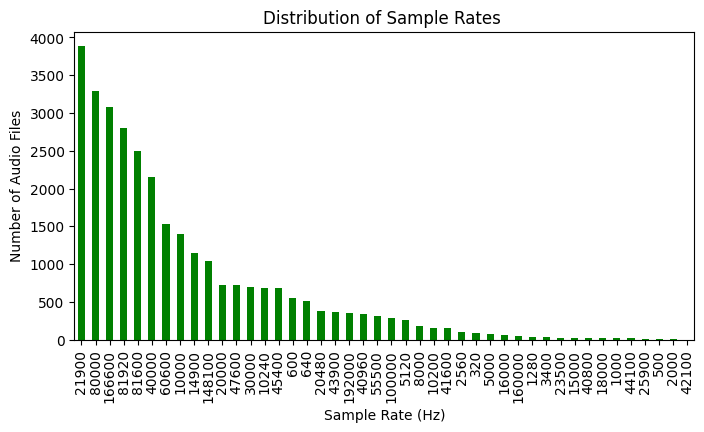

In [ ]:
# 3️⃣ Sample rates
sample_rate_counts = df['sample_rate'].value_counts().sort_values(ascending=False)  # descending by count

plt.figure(figsize=(8,4))
sample_rate_counts.plot(kind='bar', color="green")
plt.xlabel("Sample Rate (Hz)")
plt.ylabel("Number of Audio Files")
plt.title("Distribution of Sample Rates ")
plt.show()